In [2]:
using Pkg

In [3]:
Pkg.add("Roots")
Pkg.add("ForwardDiff")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [================>                        ]  38.9 %Fetching: [==========================>              ]  63.8 % Resolving package versions...
 Installed PDMats ─ v0.9.6
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [90014a1f] ↑ PDMats v0.9.5 ⇒ v0.9.6
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [1]:
using Roots  
using Plots
using ForwardDiff

# 1. Test działania różnych metod dla wybranych funkcji

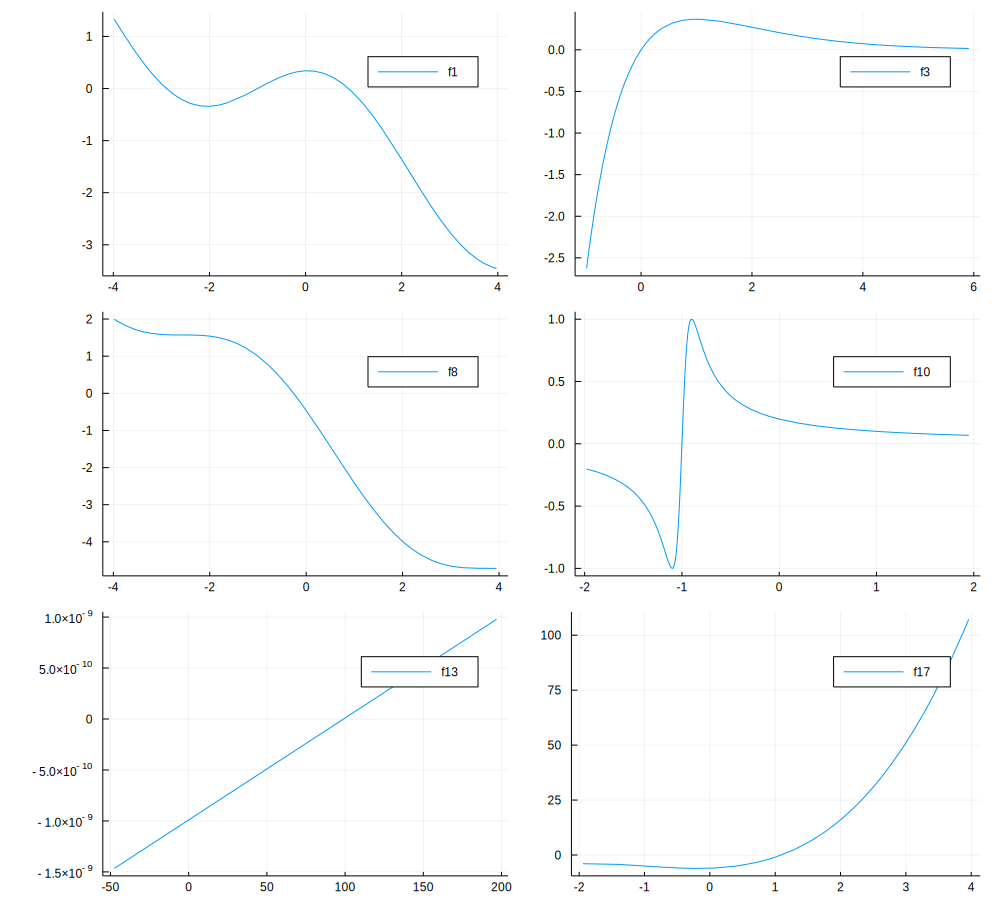

In [2]:
# http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html
# wybrane funkcje:

_f1(x) = sin(x) - x / 2
f1(x) = _f1(x + 1.0)
f1_range = (-4, 4)

f3(x) = x * exp(-x)
f3_range = (-1, 6)

f6(x) = exp(x) - 2 - 1 / (10 * x)^2 + 2 / (100 * x)^3
#f6(x) = _f6(x + 1.0)
f6_range = (-4, 3)

_f8(x) = cos(x) - x
f8(x) = _f8(x + 1.0)
f8_range = (-4, 4)

_f10(x) = 20.0 * x / (100.0 * x * x + 1.0)
f10(x) = _f10(x + 1.0)
f10_range = (-2, 2)

_f13(x) = 0.00000000001 * (x - 100.0)
f13(x) = _f13(x + 1.0)
f13_range = (-50, 200)

_f17(x) = x^3 - 2*x - 5
f17(x) = _f17(x + 1.0)
f17_range = (-2, 4)

p1 = plot(f1, f1_range[1], f1_range[2], label="f1")
p3 = plot(f3, f3_range[1], f3_range[2], label="f3")
#p6 = plot(f6, f6_range[1], f6_range[2], label="f6")
p8 = plot(f8, f8_range[1], f8_range[2], label="f8")
p10 = plot(f10, f10_range[1], f10_range[2], label="f10")
p13 = plot(f13, f13_range[1], f13_range[2], label="f13")
p17 = plot(f17, f17_range[1], f17_range[2], label="f17")

plot(p1, p3, p8, p10, p13, p17, layout=(3,2), size=(1000, 900))

In [4]:
using DataFrames
using CSV

In [5]:
algorithms = [FalsePosition(), Roots.Newton(), Roots.Steffensen()]
functions = [f1, f3, f8, f10, f13, f17]
ranges = [(-4.5, -1.1), (-1.0, 4.0), (-4.0, 4.0), (-2.0, 10.0), (-50.0, 150.0), (-2.0, 4.0)]
starting_points = [-0.2, -1.0, -1.7, -1.02, 500.0, 4.0]
fnames = ["f1", "f3", "f8", "f10", "f13", "f17"]
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [6]:
results = DataFrame(
    name = String[],
    method = String[],
    x = Float32[],
    f_x = Float32[],
    sign_change = Bool[],
    is_zero = Bool[]
)

,name,method,x,f_x,sign_change,is_zero
,String,String,Float32,Float32,Bool,Bool


In [7]:
for test_set=zip(functions, ranges, starting_points, fnames)
    fun = test_set[1]
    range = test_set[2]
    starting_point = test_set[3]
    name = test_set[4]

    x = find_zero(fun, range, FalsePosition(), verbose=true)
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "falsi" x fun(x) sign_change iszero(fun(x))])
    
    x = find_zero((fun, D(fun)), starting_point, Roots.Newton(), verbose=true)    
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "newton" x fun(x) sign_change iszero(fun(x))])
    
    x = find_zero(fun, starting_point, Roots.Steffensen(), verbose=true) 
    sign_change = fun(prevfloat(x)) * fun(x) < 0.0 || fun(x) * fun(nextfloat(x)) < 0.0
    push!(results, [name "steffensen" x fun(x) sign_change iszero(fun(x))])
end

Results of univariate zero finding:

* Converged to: -2.895494267033981
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 7
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-4.5000000000000000, -1.1000000000000001)
(a_1, b_1) = (-4.5000000000000000, -2.7999999999999998)
(a_2, b_2) = (-2.7999999999999998, -2.9255409724929318)
(a_3, b_3) = (-2.9255409724929318, -2.8937563863899567)
(a_4, b_4) = (-2.9255409724929318, -2.8954646365086854)
(a_5, b_5) = (-2.8954646365086854, -2.8954942676428854)
(a_6, b_6) = (-2.8954942676428854, -2.8954942670339703)
(a_7, b_7) = (-2.8954942676428854, -2.8954942670339809)

Results of univariate zero finding:

* Converged to: -2.895494267033981
* Algorithm: Roots.Newton()
* iterations: 7
* function evaluations: 15
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -0.2000000000000000,	 fx_0 =  0.3173560908995228
x_1 = -1.8133465500631434,	 fx_1 = -0


* Converged to: -1.0
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0200000000000000,	 fx_0 = -0.3846153846153850
x_1 = -0.9983333333333333,	 fx_1 =  0.0333240766453771
x_2 = -1.0000009261831990,	 fx_2 = -0.0000185236639789
x_3 = -0.9999999999999999,	 fx_3 =  0.0000000000000022
x_4 = -1.0000000000000000,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -1.0
* Algorithm: Roots.Steffensen()
* iterations: 4
* function evaluations: 7
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 = -1.0200000000000000,	 fx_0 = -0.3846153846153850
x_1 = -0.9983341112096208,	 fx_1 =  0.0333085320721878
x_2 = -1.0000608823342949,	 fx_2 = -0.0012176462345583
x_3 = -0.9999999837216763,	 fx_3 =  0.0000003255664738
x_4 = -1.0000000000000000,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: 98.994391877202

In [9]:
iters = [7, 7, 5, 41, 7, 8, 8, 7, 7, 1, 4, 4, 5, 1, 1, 11, 7, 9]
evals = [9, 15, 9, 43, 15, 12, 10, 15, 11, 3, 9, 7, 7, 3, 4, 13, 15, 13]
results[:iterations] = iters
results[:evaluations] = evals
#show(results, allrows=true, allcols=true)
results

,name,method,x,f_x,sign_change,is_zero,iterations,evaluations
,String,String,Float32,Float32,Bool,Bool,Int64,Int64
1,f1,falsi,-2.89549,0.0,false,true,7,9
2,f1,newton,-2.89549,0.0,false,true,7,15
3,f1,steffensen,-1.0,-1.11022e-16,false,false,5,9
4,f3,falsi,1.81899e-12,1.81899e-12,false,false,41,43
5,f3,newton,-8.81e-27,-8.81e-27,false,false,7,15
6,f3,steffensen,0.0,0.0,false,true,8,12
7,f8,falsi,-0.260915,0.0,false,true,8,10
8,f8,newton,-0.260915,1.11022e-16,false,false,7,15
9,f8,steffensen,-0.260915,0.0,false,true,7,11


# 2. Trudna funkcja

Szukanie pierwiastków z wykorzystaniem metody reguły falsi ma gwarantowaną zbieżność (przy spełnieniu założeń dotyczących ciągłości funkcji i znaków na krańcach przedziału), stąd metoda bezproblemowo radzi sobie z tego typu przykładami.

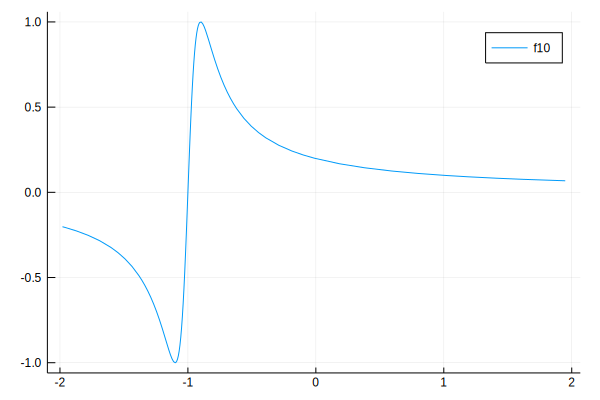

In [10]:
plot(p10)

In [11]:
falsi_result = find_zero(f10, (-100, 100), FalsePosition(), verbose=true)

Results of univariate zero finding:

* Converged to: -1.0
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 24
* function evaluations: 26
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = (-100.0000000000000000,  0.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000, -50.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000, -49.7967488105657452)
(a_3, b_3) = ( 0.0000000000000000, -49.3918721259526592)
(a_4, b_4) = ( 0.0000000000000000, -48.5886229304120150)
(a_5, b_5) = ( 0.0000000000000000, -47.0081463904126053)
(a_6, b_6) = ( 0.0000000000000000, -43.9512256353502764)
(a_7, b_7) = ( 0.0000000000000000, -38.2515390838770557)
(a_8, b_8) = ( 0.0000000000000000, -28.4692809708536174)
(a_9, b_9) = ( 0.0000000000000000, -14.7361272506181606)
(a_10, b_10) = ( 0.0000000000000000, -3.1173059782341461)
(a_11, b_11) = (-3.1173059782341461, -0.0632882238546215)
(a_12, b_12) = (-0.0632882238546215, -2.1746714058312762)
(a_13, b_13) = (-0.0632882238

-1.0

In [28]:
test_points = -1.5:0.01:1.5

-1.5:0.01:1.5

In [29]:
newton_results = [(start_x, find_zero((f10, D(f10)), start_x, Roots.Newton())) for start_x in test_points]

301-element Array{Tuple{Float64,Float64},1}:
 (-1.5, -1.769208374252525e7)  
 (-1.49, -1.7376100886712663e7)
 (-1.48, -1.706099479035368e7) 
 (-1.47, -1.6746827353351686e7)
 (-1.46, -1.6433666602276266e7)
 (-1.45, -1.6121587487725694e7)
 (-1.44, -1.5810672812637903e7)
 (-1.43, -1.5501014317906512e7)
 (-1.42, -1.519271395801472e7) 
 (-1.41, -2.9771769815131754e7)
 (-1.4, -2.916131070031316e7)  
 (-1.39, -2.8554335229660816e7)
 (-1.38, -2.795116548702411e7) 
 ⋮                             
 (1.39, 2.009561428109401e7)   
 (1.4, 2.0179304822001707e7)   
 (1.41, 2.0262996990149118e7)  
 (1.42, 2.0346690765289452e7)  
 (1.43, 2.0430386127510868e7)  
 (1.44, 2.051408305722931e7)   
 (1.45, 2.0597781535181962e7)  
 (1.46, 2.0681481542420626e7)  
 (1.47, 2.076518306030536e7)   
 (1.48, 2.084888607049801e7)   
 (1.49, 2.0932590554956518e7)  
 (1.5, 2.1016296495928653e7)   

In [30]:
stef_results = [(start_x, find_zero(f10, start_x, Roots.Steffensen())) for start_x in test_points]

301-element Array{Tuple{Float64,Float64},1}:
 (-1.5, -1.8011818318179578e7) 
 (-1.49, -1.7607731942333095e7)
 (-1.48, -1.825673041263693e7) 
 (-1.47, -1.7829260823710285e7)
 (-1.46, -1.80045904349049e7)  
 (-1.45, -1.6807351522254456e7)
 (-1.44, -1.656481549344165e7) 
 (-1.43, -1.6313649313561428e7)
 (-1.42, -1.6543564768424487e7)
 (-1.41, -1.5932357642743092e7)
 (-1.4, -1.526585718513072e7)  
 (-1.39, -1.5301474651556434e7)
 (-1.38, -2.707525252175719e7) 
 ⋮                             
 (1.39, 2.086073538132757e7)   
 (1.4, 2.0083929177576184e7)   
 (1.41, 2.2980623280578945e7)  
 (1.42, 2.079772481927243e7)   
 (1.43, 1.9836320016928587e7)  
 (1.44, 1.910437175723114e7)   
 (1.45, 1.912777240468334e7)   
 (1.46, 2.142003427285077e7)   
 (1.47, 2.2955042979223557e7)  
 (1.48, 2.160877823499923e7)   
 (1.49, 2.2544500217493165e7)  
 (1.5, 2.1373230030754503e7)   

Zauważmy jednak, że dla metod korzystających z pochodnej (lub ją przybliżających), jeśli początkowy punkt dla przykładu funkcji f10 nie jest dobrany odpowiednio blisko pierwiastka, każda kolejna iteracja powoduje oddalenie od miejsca zerowego.

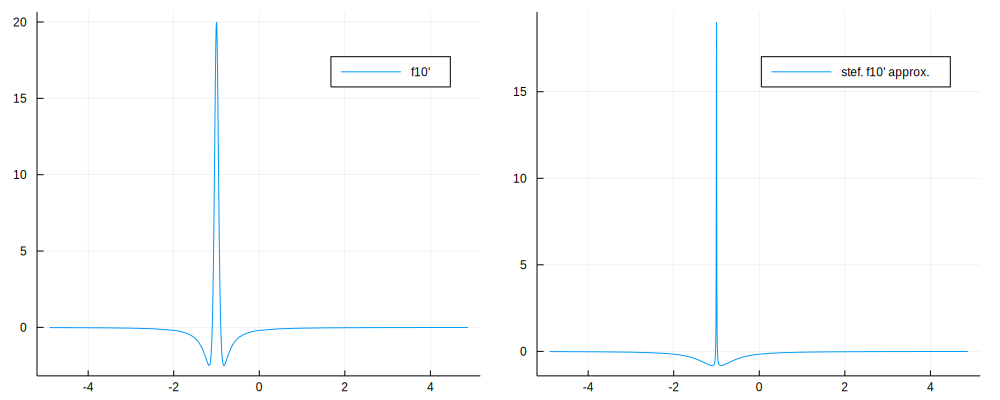

In [15]:
stef_approx(x) = (f10(x + f10(x)) - f10(x))/f10(x)
derp = plot(D(f10), label="f10'")
stefp = plot(stef_approx, label="stef. f10' approx.")
plot(derp, stefp, layout=(1, 2), size=(1000, 400))

# 3. Niedziałający przykład

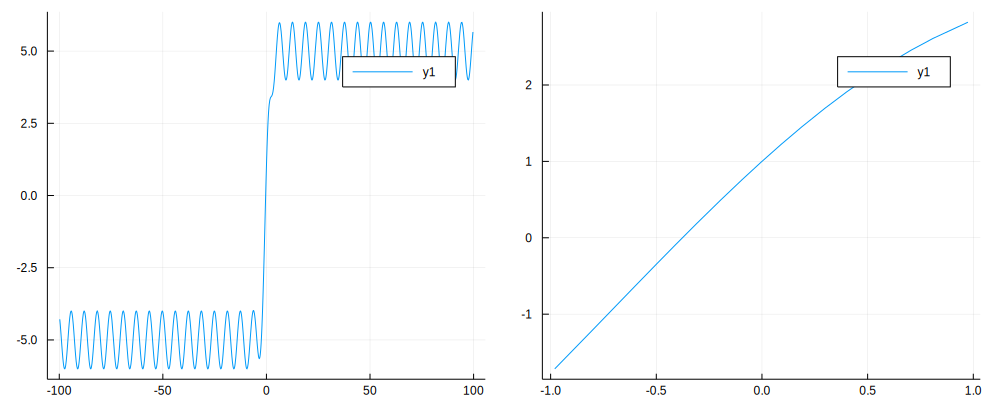

In [16]:
sigmoid(x) = 1.0 / (1.0 + exp(-x))
f_hard(x) = cos(x) + 10.0 * sigmoid(x) - 5.0

hard_global = plot(f_hard, -100, 100)
hard_local = plot(f_hard, -1, 1)
plot(hard_global, hard_local, layout=(1, 2), size=(1000, 400))

In [17]:
points2 = -10.:1.0:10.0
newton2 = [
    (start_x, 
    try
        find_zero((f_hard, D(f_hard)), start_x, Roots.Newton(), verbose=true)
    catch
        NaN
    end
    )
    for start_x in points2
]
stef2 = [
    (start_x, 
    try
        find_zero(f_hard, start_x, Roots.Steffensen(), verbose=true)
    catch
        NaN
    end
    )
    for start_x in points2
]

Results of univariate zero finding:

* Convergence failed: Too many steps taken. 
* Algorithm Roots.Newton()

Trace:
x_0 = -10.0000000000000000,	 fx_0 = -5.8386175503894284
x_1 = -20.7412994331699103,	 fx_1 = -5.3154655109463231
x_2 = -15.1398050938499722,	 fx_2 = -5.8428907949805380
x_3 = -4.2810917236367683,	 fx_3 = -5.2816599692759061
x_4 = -11.1058697182258204,	 fx_4 = -4.8897778223216966
x_5 = -16.0262850555975760,	 fx_5 = -5.9497608944535019
x_6 = -35.0368062057602714,	 fx_6 = -5.8873239383391613
x_7 = -47.8035128459058001,	 fx_7 = -5.7778096920235384
x_8 = -56.9965294145823265,	 fx_8 = -4.0986248484563177
x_9 = -47.5317371313036716,	 fx_9 = -5.9179767725420085
x_10 = -62.4522295936553604,	 fx_10 = -4.0711957705897142
x_11 = -73.4385134125549257,	 fx_11 = -5.3791836906629982
x_12 = -79.2518271210092564,	 fx_12 = -5.7570496486199509
x_13 = -88.0633138674919138,	 fx_13 = -4.0048688204123941
x_14 = -47.4292097043492049,	 fx_14 = -5.9537508398251786
x_15 = -67.2355456679432706,	 fx_1

x_1 = -13.4347006237188644,	 fx_1 = -4.3538832956776172
x_2 = -7.7304176078976754,	 fx_2 = -4.8723594868939637
x_3 = -2.8422420565847677,	 fx_3 = -5.4046909657065845
x_4 =  3.7860696197810650,	 fx_4 =  3.9787717970945078
x_5 = -1.0798917530288064,	 fx_5 = -1.9933111498938683
x_6 = -0.3614299509507563,	 fx_6 =  0.0415267247895983
x_7 = -0.3764014820501575,	 fx_7 = -0.0000555342468704
x_8 = -0.3763815134395502,	 fx_8 = -0.0000000000959117
x_9 = -0.3763815134050628,	 fx_9 = -0.0000000000000009
x_10 = -0.3763815134050625,	 fx_10 =  0.0000000000000009
x_11 = -0.3763815134050628,	 fx_11 = -0.0000000000000009
x_12 = -0.3763815134050625,	 fx_12 =  0.0000000000000009
x_13 = -0.3763815134050628,	 fx_13 = -0.0000000000000009
x_14 = -0.3763815134050625,	 fx_14 =  0.0000000000000009
x_15 = -0.3763815134050628,	 fx_15 = -0.0000000000000009
x_16 = -0.3763815134050625,	 fx_16 =  0.0000000000000009
x_17 = -0.3763815134050628,	 fx_17 = -0.0000000000000009
x_18 = -0.3763815134050625,	 fx_18 =  0.00000000

x_5 = -0.3767635138038974,	 fx_5 = -0.0010624040022646
x_6 = -0.3763815260160258,	 fx_6 = -0.0000000350719400
x_7 = -0.3763815134050628,	 fx_7 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -0.37638151340506265
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  4.0000000000000000,	 fx_0 =  4.1664942795154722
x_1 = -0.4636408246366726,	 fx_1 = -0.2443450224831878
x_2 = -0.3769175899144820,	 fx_2 = -0.0014909340762159
x_3 = -0.3763815382322848,	 fx_3 = -0.0000000690461821
x_4 = -0.3763815134050627,	 fx_4 =  0.0000000000000000

Results of univariate zero finding:

* Converged to: -0.3763815134050629
* Algorithm: Roots.Newton()
* iterations: 41
* function evaluations: 83
* Note: Too many steps taken. 
	Algorithm stopped early, but |f(xn)| < ϵ^(1/3), where ϵ depends on xn, rtol, and atol. 

Trace:
x_0 =  5.0000000000000000,	 fx_0 =  5.2167336762203789
x_1 = -0

x_13 =  98.0608106341115047,	 fx_13 =  4.2170723540120303
x_14 =  91.2821805472932795,	 fx_14 =  4.0154469398007961
x_15 =  68.3481013973445783,	 fx_15 =  5.7200395735544767
x_16 =  60.1051736944683057,	 fx_16 =  4.0848487168089171
x_17 =  49.9718528250848522,	 fx_17 =  5.9571996642881402
x_18 =  29.3892164166435634,	 fx_18 =  4.5597170456316345
x_19 =  24.3107835442201363,	 fx_19 =  5.6807885477527158
x_20 =  16.5552290819550798,	 fx_20 =  4.3379645373685491
x_21 =  10.7672149421883638,	 fx_21 =  4.7734094434295145
x_22 =  5.8676409881150118,	 fx_22 =  5.8866811541936688
x_23 = -7.7644914559777476,	 fx_23 = -4.9063855680538238
x_24 = -2.8592845002787950,	 fx_24 = -5.4183813162556325
x_25 =  3.9887914600812060,	 fx_25 =  4.1560624003283397
x_26 = -0.4898483392745518,	 fx_26 = -0.3183028190852450
x_27 = -0.3772274906114332,	 fx_27 = -0.0023528917649882
x_28 = -0.3763815751921930,	 fx_28 = -0.0000001718341842
x_29 = -0.3763815134050630,	 fx_29 = -0.0000000000000009
x_30 = -0.376381513405

x_12 = -53297.4412433769466588,	 fx_12 = -5.9486438660222873
x_13 = -52607.3246185243842774,	 fx_13 = -5.2135058554048257
x_14 = -52579.2384757083200384,	 fx_14 = -4.9730321726027924
x_15 = -52604.3234441398162744,	 fx_15 = -4.9253256807459715
x_16 = -52630.8128944396594306,	 fx_16 = -5.9585774560718594
x_17 = -53501.3955116543220356,	 fx_17 = -4.0026357476078989
x_18 = -53491.3336353887571022,	 fx_18 = -5.8448683550909690
x_19 = -53602.6413055858502048,	 fx_19 = -4.2943455999154754
x_20 = -53549.1247055599742453,	 fx_20 = -5.7788757128883628
x_21 = -53387.0826181702359463,	 fx_21 = -4.5850758904562552
x_22 = -53338.7413322163047269,	 fx_22 = -4.2899728545010767
x_23 = -53349.9400412199756829,	 fx_23 = -4.1670629399494228
x_24 = -53339.9494990266175591,	 fx_24 = -5.4065091867355717
x_25 = -53374.3905829959039693,	 fx_25 = -4.7023837036209768
x_26 = -53356.7743840801922488,	 fx_26 = -4.0006210227085166
x_27 = -53366.6207782191268052,	 fx_27 = -5.9262824104818179
x_28 = -53181.7994573308

x_40 =  34508.8506441197387176,	 fx_40 =  4.9738622144125504
x_41 =  34482.7074240405709133,	 fx_41 =  5.8329059610691978

Results of univariate zero finding:

* Converged to: -0.37638151340506276
* Algorithm: Roots.Steffensen()
* iterations: 14
* function evaluations: 18
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  3.0000000000000000,	 fx_0 =  3.5357487716238882
x_1 = -8.3818367043190261,	 fx_1 = -5.5013921537424713
x_2 = -1.4531025330323963,	 fx_2 = -2.9873323070604703
x_3 =  6.7799677593219094,	 fx_3 =  5.8677703732622017
x_4 =  1.3243826931189950,	 fx_4 =  3.1430269838824199
x_5 = -4.9687057286295229,	 fx_5 = -4.6774392253612609
x_6 = -1.2047947487750332,	 fx_6 = -2.3358817292921783
x_7 =  2.5499927818681742,	 fx_7 =  3.4456807873856761
x_8 =  0.3122241479164658,	 fx_8 =  1.7259332930465199
x_9 = -1.9335935667106572,	 fx_9 = -4.0913571808844145
x_10 = -0.3540880434995783,	 fx_10 =  0.0618774208506112
x_11 = -0.3776204796289430,	 fx_11 = -0.00

x_40 = -119196.9347798538801726,	 fx_40 = -4.8041602817799998
x_41 = -119168.0348706100048730,	 fx_41 = -4.5845279660679017

Results of univariate zero finding:

* Converged to: -0.37638151340506276
* Algorithm: Roots.Steffensen()
* iterations: 11
* function evaluations: 16
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  9.0000000000000000,	 fx_0 =  4.0876357923554600
x_1 =  18.9484436558994460,	 fx_1 =  5.9951145320646990
x_2 = -12.3190393788005856,	 fx_2 = -4.0303861078069865
x_3 =  0.2509093724827753,	 fx_3 =  1.5926901965382871
x_4 = -3.3094254093317743,	 fx_4 = -5.6334565720121468
x_5 = -0.5338117915087248,	 fx_5 = -0.4428433023354721
x_6 = -0.2970070371062395,	 fx_6 =  0.2191096934475096
x_7 = -0.3753905741165502,	 fx_7 =  0.0027556326630416
x_8 = -0.3763889202259191,	 fx_8 = -0.0000205988823527
x_9 = -0.3763815133966114,	 fx_9 =  0.0000000000235030
x_10 = -0.3763815134050625,	 fx_10 =  0.0000000000000009
x_11 = -0.3763815134050628,	 fx_11 =  

21-element Array{Tuple{Float64,Float64},1}:
 (-10.0, NaN)                
 (-9.0, -0.3763815134050627) 
 (-8.0, NaN)                 
 (-7.0, -0.3763815134050626) 
 (-6.0, NaN)                 
 (-5.0, NaN)                 
 (-4.0, NaN)                 
 (-3.0, -0.37638151340506276)
 (-2.0, -0.3763815134050626) 
 (-1.0, -0.3763815134050626) 
 (0.0, -0.37638151340506276) 
 (1.0, -0.37638151340506276) 
 (2.0, NaN)                  
 (3.0, -0.37638151340506276) 
 (4.0, -0.37638151340506265) 
 (5.0, -0.3763815134050626)  
 (6.0, NaN)                  
 (7.0, NaN)                  
 (8.0, NaN)                  
 (9.0, -0.37638151340506276) 
 (10.0, NaN)                 

In [18]:
newton2

21-element Array{Tuple{Float64,Float64},1}:
 (-10.0, NaN)                
 (-9.0, -0.37638151340506276)
 (-8.0, -0.3763815134050627) 
 (-7.0, -0.3763815134050627) 
 (-6.0, -0.37638151340506254)
 (-5.0, NaN)                 
 (-4.0, -0.3763815134050628) 
 (-3.0, NaN)                 
 (-2.0, -0.37638151340506265)
 (-1.0, -0.37638151340506276)
 (0.0, -0.37638151340506276) 
 (1.0, -0.37638151340506276) 
 (2.0, NaN)                  
 (3.0, -0.37638151340506276) 
 (4.0, -0.37638151340506265) 
 (5.0, -0.3763815134050629)  
 (6.0, NaN)                  
 (7.0, NaN)                  
 (8.0, -0.3763815134050627)  
 (9.0, -0.37638151340506265) 
 (10.0, NaN)                 

In [19]:
stef2

21-element Array{Tuple{Float64,Float64},1}:
 (-10.0, NaN)                
 (-9.0, -0.3763815134050627) 
 (-8.0, NaN)                 
 (-7.0, -0.3763815134050626) 
 (-6.0, NaN)                 
 (-5.0, NaN)                 
 (-4.0, NaN)                 
 (-3.0, -0.37638151340506276)
 (-2.0, -0.3763815134050626) 
 (-1.0, -0.3763815134050626) 
 (0.0, -0.37638151340506276) 
 (1.0, -0.37638151340506276) 
 (2.0, NaN)                  
 (3.0, -0.37638151340506276) 
 (4.0, -0.37638151340506265) 
 (5.0, -0.3763815134050626)  
 (6.0, NaN)                  
 (7.0, NaN)                  
 (8.0, NaN)                  
 (9.0, -0.37638151340506276) 
 (10.0, NaN)                 

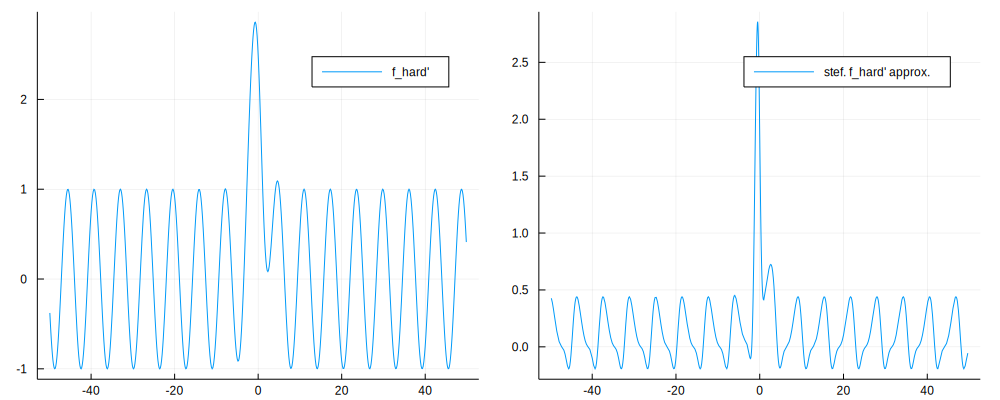

In [27]:
approx(x) = (f_hard(x + f_hard(x)) - f_hard(x))/f_hard(x)
derp = plot(D(f_hard), -50, 50, label="f_hard'")
stefp = plot(approx, -50, 50, label="stef. f_hard' approx.")
plot(derp, stefp, layout=(1, 2), size=(1000, 400))